In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
data_path = "data"
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

In [5]:
# redimensionar imagens substituindo as originais e transformando em png
def redimensionar_imagens(path, size):
    for class_name in classes:
        class_path = os.path.join(path, class_name)
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            img = Image.open(image_path)
            img = img.resize(size)
            img.save(image_path.replace(".jpg", ".png"))

def criar_csvs(data_path, proporcao=(0.8, 0.1, 0.1)):
    classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

    # Crie um DataFrame Pandas para todas as amostras
    data = []

    for label, class_name in enumerate(classes):
        class_path = os.path.join(data_path, class_name)
        for image in os.listdir(class_path):
            data.append(["data/" + os.path.join(class_name, image), label])

    df = pd.DataFrame(data, columns=["path", "label"])

    # Divida o DataFrame em treino, teste e validação mantendo as classes balanceadas
    train_df, test_val_df = train_test_split(df, test_size=proporcao[1] + proporcao[2], stratify=df["label"])
    test_df, val_df = train_test_split(test_val_df, test_size=proporcao[2] / (proporcao[1] + proporcao[2]), stratify=test_val_df["label"])

    # Salve os DataFrames como arquivos CSV
    train_df.to_csv("data/train.csv", index=False)
    test_df.to_csv("data/test.csv", index=False)
    val_df.to_csv("data/valid.csv", index=False)

In [ ]:
def remove_non_png_images(dataset_dir):
    """
    Remove imagens que não são arquivos PNG em um conjunto de dados organizado em pastas de classe.

    Args:
    - dataset_dir (str): O caminho para o diretório raiz do conjunto de dados.

    Returns:
    - None
    """
    for class_folder in os.listdir(dataset_dir):
        class_folder_path = os.path.join(dataset_dir, class_folder)

        if os.path.isdir(class_folder_path):
            for filename in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, filename)

                if not filename.endswith(".png"):
                    os.remove(file_path)
                    print(f"Arquivo removido: {file_path}")

# Exemplo de uso
dataset_dir = "./data"
remove_non_png_images(dataset_dir)

In [7]:
data_path = "data"  # Substitua pelo caminho real para seus dados
# redimensionar_imagens(data_path, (1360, 1360))
criar_csvs(data_path)

In [ ]:
from PIL import Image
import os

def check_and_remove_invalid_images(root_dataset_dir):
    """
    Check if images can be loaded and remove invalid images from a dataset.

    Args:
    - root_dataset_dir (str): The root directory of the dataset.

    Returns:
    - None
    """
    for class_folder in os.listdir(root_dataset_dir):
        class_folder_path = os.path.join(root_dataset_dir, class_folder)

        if os.path.isdir(class_folder_path):
            for filename in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, filename)

                if filename.endswith((".png", ".jpg", ".jpeg", ".bmp")):
                    try:
                        img = Image.open(file_path)
                        img.verify()
                    except (IOError, SyntaxError):
                        # If PIL couldn't open the image, it's invalid.
                        os.remove(file_path)
                        print(f"Invalid image removed: {file_path}")

# Example usage
root_dataset_dir = "./data"
check_and_remove_invalid_images(root_dataset_dir)


In [8]:
train = pd.read_csv("data/train.csv")

In [11]:
train

,path,label
0,data/non-accessory/FRGC_04324d129.jpg,1
1,data/non-accessory/FRGC_04219d157.jpg,1
2,data/non-accessory/FRGC_04219d128_px_6.png,1
3,data/non-accessory/FRGC_04288d81.jpg,1
4,data/non-accessory/AR_FDB_w-004-16_px_6.png,1
...,...,...
2579,data/accessory/AR_m-047-8.png,0
2580,data/accessory/AR_FDB_m-045-22.png,0
2581,data/non-accessory/Fall2002_04424d59.JPG,1
2582,data/non-accessory/FRGC_04842d82.jpg,1


<Axes: xlabel='label'>

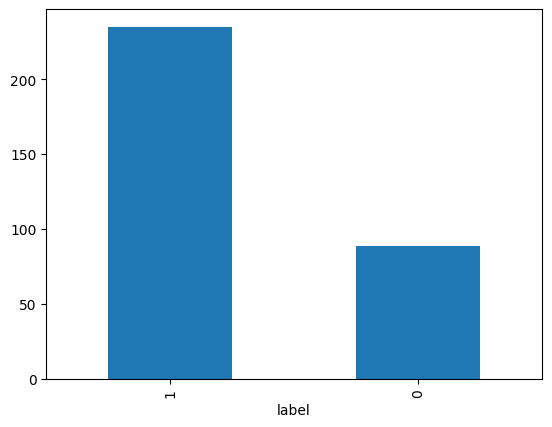

In [17]:
pd.read_csv("data/valid.csv")["label"].value_counts().plot(kind="bar")

<Axes: xlabel='label'>

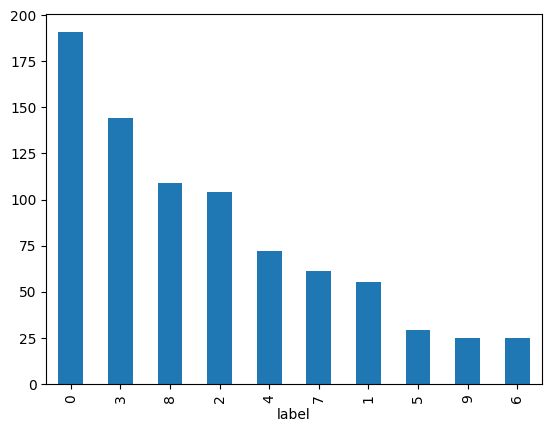

In [18]:
pd.read_csv("validacao.csv")["label"].value_counts().plot(kind="bar")

In [15]:
import torch
import torch.nn as nn

# Suponha que você tenha os tensores de logits e rótulos
logits = torch.tensor([[0.5080, 0.5018, 0.4857, 0.4907, 0.5006, 0.5141, 0.4974, 0.5144, 0.5163, 0.5089]], device='cuda:0')
labels = torch.tensor([7], device='cuda:0')

# Crie uma instância da função de perda CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Calcule a perda
loss = criterion(logits, labels)

# Imprima a perda
print("Perda de Entropia Cruzada:", loss.item())


Perda de Entropia Cruzada: 2.2920236587524414


In [16]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)

In [20]:
input

tensor([[ 2.4985, -1.0577,  0.6123,  0.5745,  1.0244],
        [-0.5012, -0.3175, -0.3718, -0.3878,  0.8063],
        [-1.8537,  0.8074,  0.8869,  0.9744,  0.3492]], requires_grad=True)

In [36]:
target

tensor([ 20,  49, 112,  88,  34,  58,   9,  66,  89,  89])

In [39]:
labels=  torch.tensor([[0]])
labels.squeeze(0)

tensor([0])

In [21]:
import torch

criterion = torch.nn.CrossEntropyLoss()
criterion(torch.tensor([0.45, 0.22, 0.32]).unsqueeze(1).unsqueeze(0), torch.tensor([1]).unsqueeze(0).long())
#tensor(1.2131)

tensor(1.2131)

In [22]:
torch.tensor([0.45, 0.22, 0.32]).unsqueeze(1).unsqueeze(0)

tensor([[[0.4500],
         [0.2200],
         [0.3200]]])

In [23]:
torch.tensor([1]).unsqueeze(0).long()

tensor([[1]])

In [24]:
torch.tensor([0.45, 0.22, 0.32])

tensor([0.4500, 0.2200, 0.3200])

In [25]:
criterion = nn.CrossEntropyLoss()

output = torch.randn(10, 120).float()
target = torch.FloatTensor(10).uniform_(0, 120).long()

loss = criterion(output, target)

In [27]:
output

tensor([[-1.0900,  0.7638,  0.3156,  ..., -0.4458, -0.8394, -0.3470],
        [ 0.3194,  1.6172, -0.1310,  ..., -1.1623, -0.6901,  1.2697],
        [ 1.0176,  0.4200, -1.6243,  ...,  0.3499, -0.7054,  1.9038],
        ...,
        [-0.8537, -0.5236, -0.8722,  ...,  1.8361, -0.9416,  0.4922],
        [-1.2941,  0.5065, -0.6403,  ..., -0.1601,  0.6813, -0.2494],
        [-1.4759,  0.7388, -0.4881,  ..., -0.9073,  0.0911,  0.1367]])

In [28]:
import torch as th

In [40]:
preds=  th.tensor([[0.5088, 0.5011, 0.4853, 0.4905, 0.4983, 0.5142, 0.4986, 0.5151, 0.5161,
         0.5080]])
labels=  th.tensor([[0]])

criterion = nn.CrossEntropyLoss()
criterion(preds, labels.squeeze(0))

tensor(2.2974)

In [41]:
preds

tensor([[0.5088, 0.5011, 0.4853, 0.4905, 0.4983, 0.5142, 0.4986, 0.5151, 0.5161,
         0.5080]])

In [34]:
labels.squeeze()

tensor(0, device='cuda:0')

In [42]:
preds=  th.tensor([[0.5088, 0.5011, 0.4853, 0.4905, 0.4983, 0.5142, 0.4986, 0.5151, 0.5161,
         0.5080]], device='cuda:0')
labels=  th.tensor([0], device='cuda:0')

In [47]:
labels = th.tensor([[0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]], device='cuda:0')
preds=  th.tensor([[0.5067, 0.4992, 0.4838, 0.4916, 0.4998, 0.5193, 0.4980, 0.5089, 0.5121,
         0.5101],
        [0.5065, 0.4966, 0.4871, 0.4878, 0.4982, 0.5177, 0.4985, 0.5131, 0.5160,
         0.5074],
        [0.5067, 0.5053, 0.4818, 0.4933, 0.4993, 0.5165, 0.4980, 0.5140, 0.5164,
         0.5069],
        [0.5089, 0.5009, 0.4838, 0.4890, 0.4964, 0.5167, 0.4990, 0.5145, 0.5169,
         0.5056],
        [0.5079, 0.5040, 0.4855, 0.4908, 0.4983, 0.5116, 0.4986, 0.5148, 0.5196,
         0.5104],
        [0.5065, 0.5010, 0.4828, 0.4906, 0.4980, 0.5147, 0.4954, 0.5163, 0.5191,
         0.5082],
        [0.5059, 0.5009, 0.4829, 0.4903, 0.4954, 0.5146, 0.4966, 0.5147, 0.5188,
         0.5111],
        [0.5087, 0.5004, 0.4822, 0.4951, 0.4989, 0.5187, 0.4976, 0.5125, 0.5165,
         0.5066],
        [0.5077, 0.5004, 0.4859, 0.4949, 0.4960, 0.5154, 0.4953, 0.5165, 0.5182,
         0.5095],
        [0.5103, 0.4999, 0.4850, 0.4926, 0.4986, 0.5126, 0.4986, 0.5168, 0.5159,
         0.5065],
        [0.5083, 0.5005, 0.4840, 0.4893, 0.4992, 0.5101, 0.4978, 0.5125, 0.5192,
         0.5101],
        [0.5072, 0.5008, 0.4841, 0.4913, 0.5004, 0.5134, 0.4960, 0.5140, 0.5157,
         0.5084],
        [0.5072, 0.5021, 0.4852, 0.4978, 0.4964, 0.5167, 0.4954, 0.5170, 0.5183,
         0.5077],
        [0.5076, 0.4990, 0.4841, 0.4892, 0.5013, 0.5170, 0.4994, 0.5081, 0.5154,
         0.5069],
        [0.5066, 0.5013, 0.4870, 0.4917, 0.4959, 0.5155, 0.5009, 0.5141, 0.5187,
         0.5053],
        [0.5083, 0.5008, 0.4872, 0.4907, 0.4989, 0.5155, 0.5015, 0.5144, 0.5157,
         0.5101]], device='cuda:0')

In [49]:
labels.squeeze(1)

tensor([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], device='cuda:0')

In [46]:
preds.shape

torch.Size([1, 10])

In [50]:
criterion(preds, labels.squeeze(1))

tensor(2.3016, device='cuda:0')